In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pickle as pkl
import glob
import os
from scipy.stats import bootstrap
coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [87]:
filetag = 'pl'
era_hour = 12

In [88]:
all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))

In [89]:
index = all_node_file['node1']

In [90]:
for k in all_node_file.keys():
    print(len(all_node_file[k]))

1624
1528
1463
1486
1243
1727
2115
1017
2407


In [91]:
def save_node_clim(filetag, node, era_hour):
    
    nodestr = 'node'+str(node)
    
    all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
    node_days = all_node_file[nodestr]
    node_days_era = []
    for nd in node_days:
        node_days_era.append(nd.replace(hour=era_hour))
    node_days_era = pd.Series(node_days_era).values
    
    if filetag == 'pl':
        fft = 'pressure_levels'
    else:
        fft = 'surface'
        
    filebase = cnst.other_drive + '/ERA5_WAf/hourly/' 
    filepath = filebase + fft+'/ERA5*'+filetag+'.nc'
    
    def means(da, node_days):
        
        da = da['z'].sel(time=(da['time.hour']==era_hour), level=925)
        
        intersect_dates = np.intersect1d(node_days, da.time.values)
        #ipdb.set_trace()
        if len(intersect_dates) == 0:
            return None
        try:
            da = da.sel(time=intersect_dates)
        except:
            return None

        da = u_darrays.flip_lat(da)
        return da
    
    srfc_list = []
    #ipdb.set_trace()
    for f in glob.glob(filepath):

        print('Doing', f)
        srfc = xr.open_dataset(f) 
        print('Opened', f)
#         if f == '/media/ck/Elements//Africa/WestAfrica/ERA5/hourly/pressure_levels/ERA5_1991_04_pl.nc':
#             ipdb.set_trace()
        srfc_concat = means(srfc,node_days_era)
        if srfc_concat is None:
            print('SRFC Is NAN!!')
            continue
   
        srfc_list.append(srfc_concat)
    print('Concatenating node', node)
    #ipdb.set_trace()
    full = xr.concat(srfc_list, dim='time')
    return full

In [92]:
#out = save_node_clim(filetag, 1, 12)

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
Opened /media/ck/LSto

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_05_pl.nc
SRFC Is

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_03_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_03_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_05

KeyboardInterrupt: 

In [93]:
all_nodes = {}
for n in range(1,10):
    
    out = save_node_clim(filetag, n, 12)
    
    low = np.zeros_like(np.mean(out.values, axis=0))
    high = np.zeros_like(np.mean(out.values, axis=0))
    for x in np.arange(low.shape[1]):
        print('Doing', x, 'from', low.shape[1])
        for y in np.arange(low.shape[0]):
            bs = bootstrap((out.values[:,y,x],), np.mean, n_resamples=5000, confidence_level=0.99)
         #   ipdb.set_trace()
            low[y,x] = bs.confidence_interval[0]
            high[y,x] = bs.confidence_interval[1]
            
    all_nodes[n] = (np.mean(out.values,axis=0), low, high)

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1979_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_02_pl.nc
Doing /media/ck/LStor

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_03_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_07_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1992_05_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_08

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_12

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_08

Doing 62 from 143
Doing 63 from 143
Doing 64 from 143
Doing 65 from 143
Doing 66 from 143
Doing 67 from 143
Doing 68 from 143
Doing 69 from 143
Doing 70 from 143
Doing 71 from 143
Doing 72 from 143
Doing 73 from 143
Doing 74 from 143
Doing 75 from 143
Doing 76 from 143
Doing 77 from 143
Doing 78 from 143
Doing 79 from 143
Doing 80 from 143
Doing 81 from 143
Doing 82 from 143
Doing 83 from 143
Doing 84 from 143
Doing 85 from 143
Doing 86 from 143
Doing 87 from 143
Doing 88 from 143
Doing 89 from 143
Doing 90 from 143
Doing 91 from 143
Doing 92 from 143
Doing 93 from 143
Doing 94 from 143
Doing 95 from 143
Doing 96 from 143
Doing 97 from 143
Doing 98 from 143
Doing 99 from 143
Doing 100 from 143
Doing 101 from 143
Doing 102 from 143
Doing 103 from 143
Doing 104 from 143
Doing 105 from 143
Doing 106 from 143
Doing 107 from 143
Doing 108 from 143
Doing 109 from 143
Doing 110 from 143
Doing 111 from 143
Doing 112 from 143
Doing 113 from 143
Doing 114 from 143
Doing 115 from 143
Doing 116 fr

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_07_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1981_10_pl.nc
Opened 

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Doing /

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1988_06_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_08_pl.nc
Opened 

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_04

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Opened /media/ck/LSto

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_08_pl.nc
SRFC Is

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_07_pl.nc
Opened 

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_12_pl.nc
SRFC Is NAN!!
Doing /

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_12_pl.nc
Opened 

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_05

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
Opened /media/ck/LStorage/global_wa

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_03_pl.nc
Doing /media/ck/LStorage/global_wat

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_08_pl.nc
SRFC Is

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_05_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_02

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_12

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStor

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_01_pl.nc
Doing /

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2018_04_pl.nc
Opened /media/ck/LStorage/global_wa

Doing 15 from 143
Doing 16 from 143
Doing 17 from 143
Doing 18 from 143
Doing 19 from 143
Doing 20 from 143
Doing 21 from 143
Doing 22 from 143
Doing 23 from 143
Doing 24 from 143
Doing 25 from 143
Doing 26 from 143
Doing 27 from 143
Doing 28 from 143
Doing 29 from 143
Doing 30 from 143
Doing 31 from 143
Doing 32 from 143
Doing 33 from 143
Doing 34 from 143
Doing 35 from 143
Doing 36 from 143
Doing 37 from 143
Doing 38 from 143
Doing 39 from 143
Doing 40 from 143
Doing 41 from 143
Doing 42 from 143
Doing 43 from 143
Doing 44 from 143
Doing 45 from 143
Doing 46 from 143
Doing 47 from 143
Doing 48 from 143
Doing 49 from 143
Doing 50 from 143
Doing 51 from 143
Doing 52 from 143
Doing 53 from 143
Doing 54 from 143
Doing 55 from 143
Doing 56 from 143
Doing 57 from 143
Doing 58 from 143
Doing 59 from 143
Doing 60 from 143
Doing 61 from 143
Doing 62 from 143
Doing 63 from 143
Doing 64 from 143
Doing 65 from 143
Doing 66 from 143
Doing 67 from 143
Doing 68 from 143
Doing 69 from 143
Doing 70 f

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2003_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_02_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2007_11

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_05_pl.nc
Opened /media/ck/LSto

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
SRFC Is NAN!!
Doing /

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_04_pl.nc
Doing /media/ck/LStor

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_01_pl.nc
Opened /media/ck/LSto

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_09_pl.nc
Doing /

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_06_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2015_03_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_03

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2008_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2009_01_pl.nc
SRFC Is

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_06_pl.nc
Opened 

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_level

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1987_11_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1991_07_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_12_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_09_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2017_07

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_10_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_02_pl.nc
Opened /media/ck/LSto

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2010_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_07

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_07_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_05_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_01

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_10

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_02_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1995_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03_pl.nc
Opened /media/ck/LSto

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2014_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1980_08

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1984_04

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1989_10

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1993_07

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1996_12_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_01_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_03_pl.nc
Opened 

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_06_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_07_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_08_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2000_11

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_02_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_03_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_04_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_05_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2019_06_pl.nc
Doing /media/ck/LStor

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2005_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2006_01_pl.nc
Opened 

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1997_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1998_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2001_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2002_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2004_03_pl.nc
SRFC Is

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2013_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1982_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1983_01

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_10_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1986_11_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1990_10_pl.nc
Opened /media/ck/LStorage/global_wa

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_03_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_04_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_05_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1994_09_pl.nc
Opened 

Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_09_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_10_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_10_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_1999_12

Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_05_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_06_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_06_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_07_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_07_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_08_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_08_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_09_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_09_pl.nc
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2016_10_pl.nc
Opened /media/ck/LStorage/global_wa

SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_11_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_11_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_12_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2011_12_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_01_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_02_pl.nc
SRFC Is NAN!!
Doing /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/pressure_levels/ERA5_2012_03_pl.nc
Opened /media/ck/LStorage/global_water/other//ERA5_WAf/hourly/

In [101]:
#pkl.dump(all_nodes, open('/home/ck/DIR/cornkle/data/SOMS/saves/3x3_Nodes_fullYear/gph_bootstrap_0.99_5000.p', 'wb'))

In [5]:
all_nodes = pkl.load(open('/home/ck/DIR/cornkle/data/SOMS/saves/3x3_Nodes_fullYear/gph_bootstrap_0.99_5000.p', 'rb'))

(array([ 370.,  510.,  983., 2411., 3012., 1603., 1523., 1150.,  776.,
         103.]),
 array([7284.776 , 7359.106 , 7433.4355, 7507.7656, 7582.095 , 7656.4253,
        7730.7554, 7805.085 , 7879.415 , 7953.7446, 8028.0747],
       dtype=float32),
 <BarContainer object of 10 artists>)

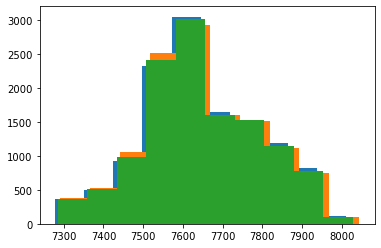

In [114]:
plt.hist(all_nodes[1][1].flatten())
plt.hist(all_nodes[1][2].flatten())
plt.hist(all_nodes[1][0].flatten())

In [115]:
for nn in range(1,10):
    mask = np.array([(all_nodes[nn][0]>=all_nodes[nn][1])&(all_nodes[nn][0]<=all_nodes[nn][2])]).astype(int)
    print(np.sum(mask==0), mask.size)

0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441


In [116]:
for nn in range(1,10):
    mask = np.array([(all_nodes[nn][0]<all_nodes[nn][1])|(all_nodes[nn][0]>all_nodes[nn][2])]).astype(int)
    print(np.sum(mask==1), mask.size)

0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441
0 12441


In [3]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None, barlabel=None, cmap='viridis'):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    #contour=None
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='r', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
#     rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='green',facecolor='none', zorder=99)
        
#     ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label(barlabel)

0
0
0


/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


0
0
0
0
0
0


/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ck/miniconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


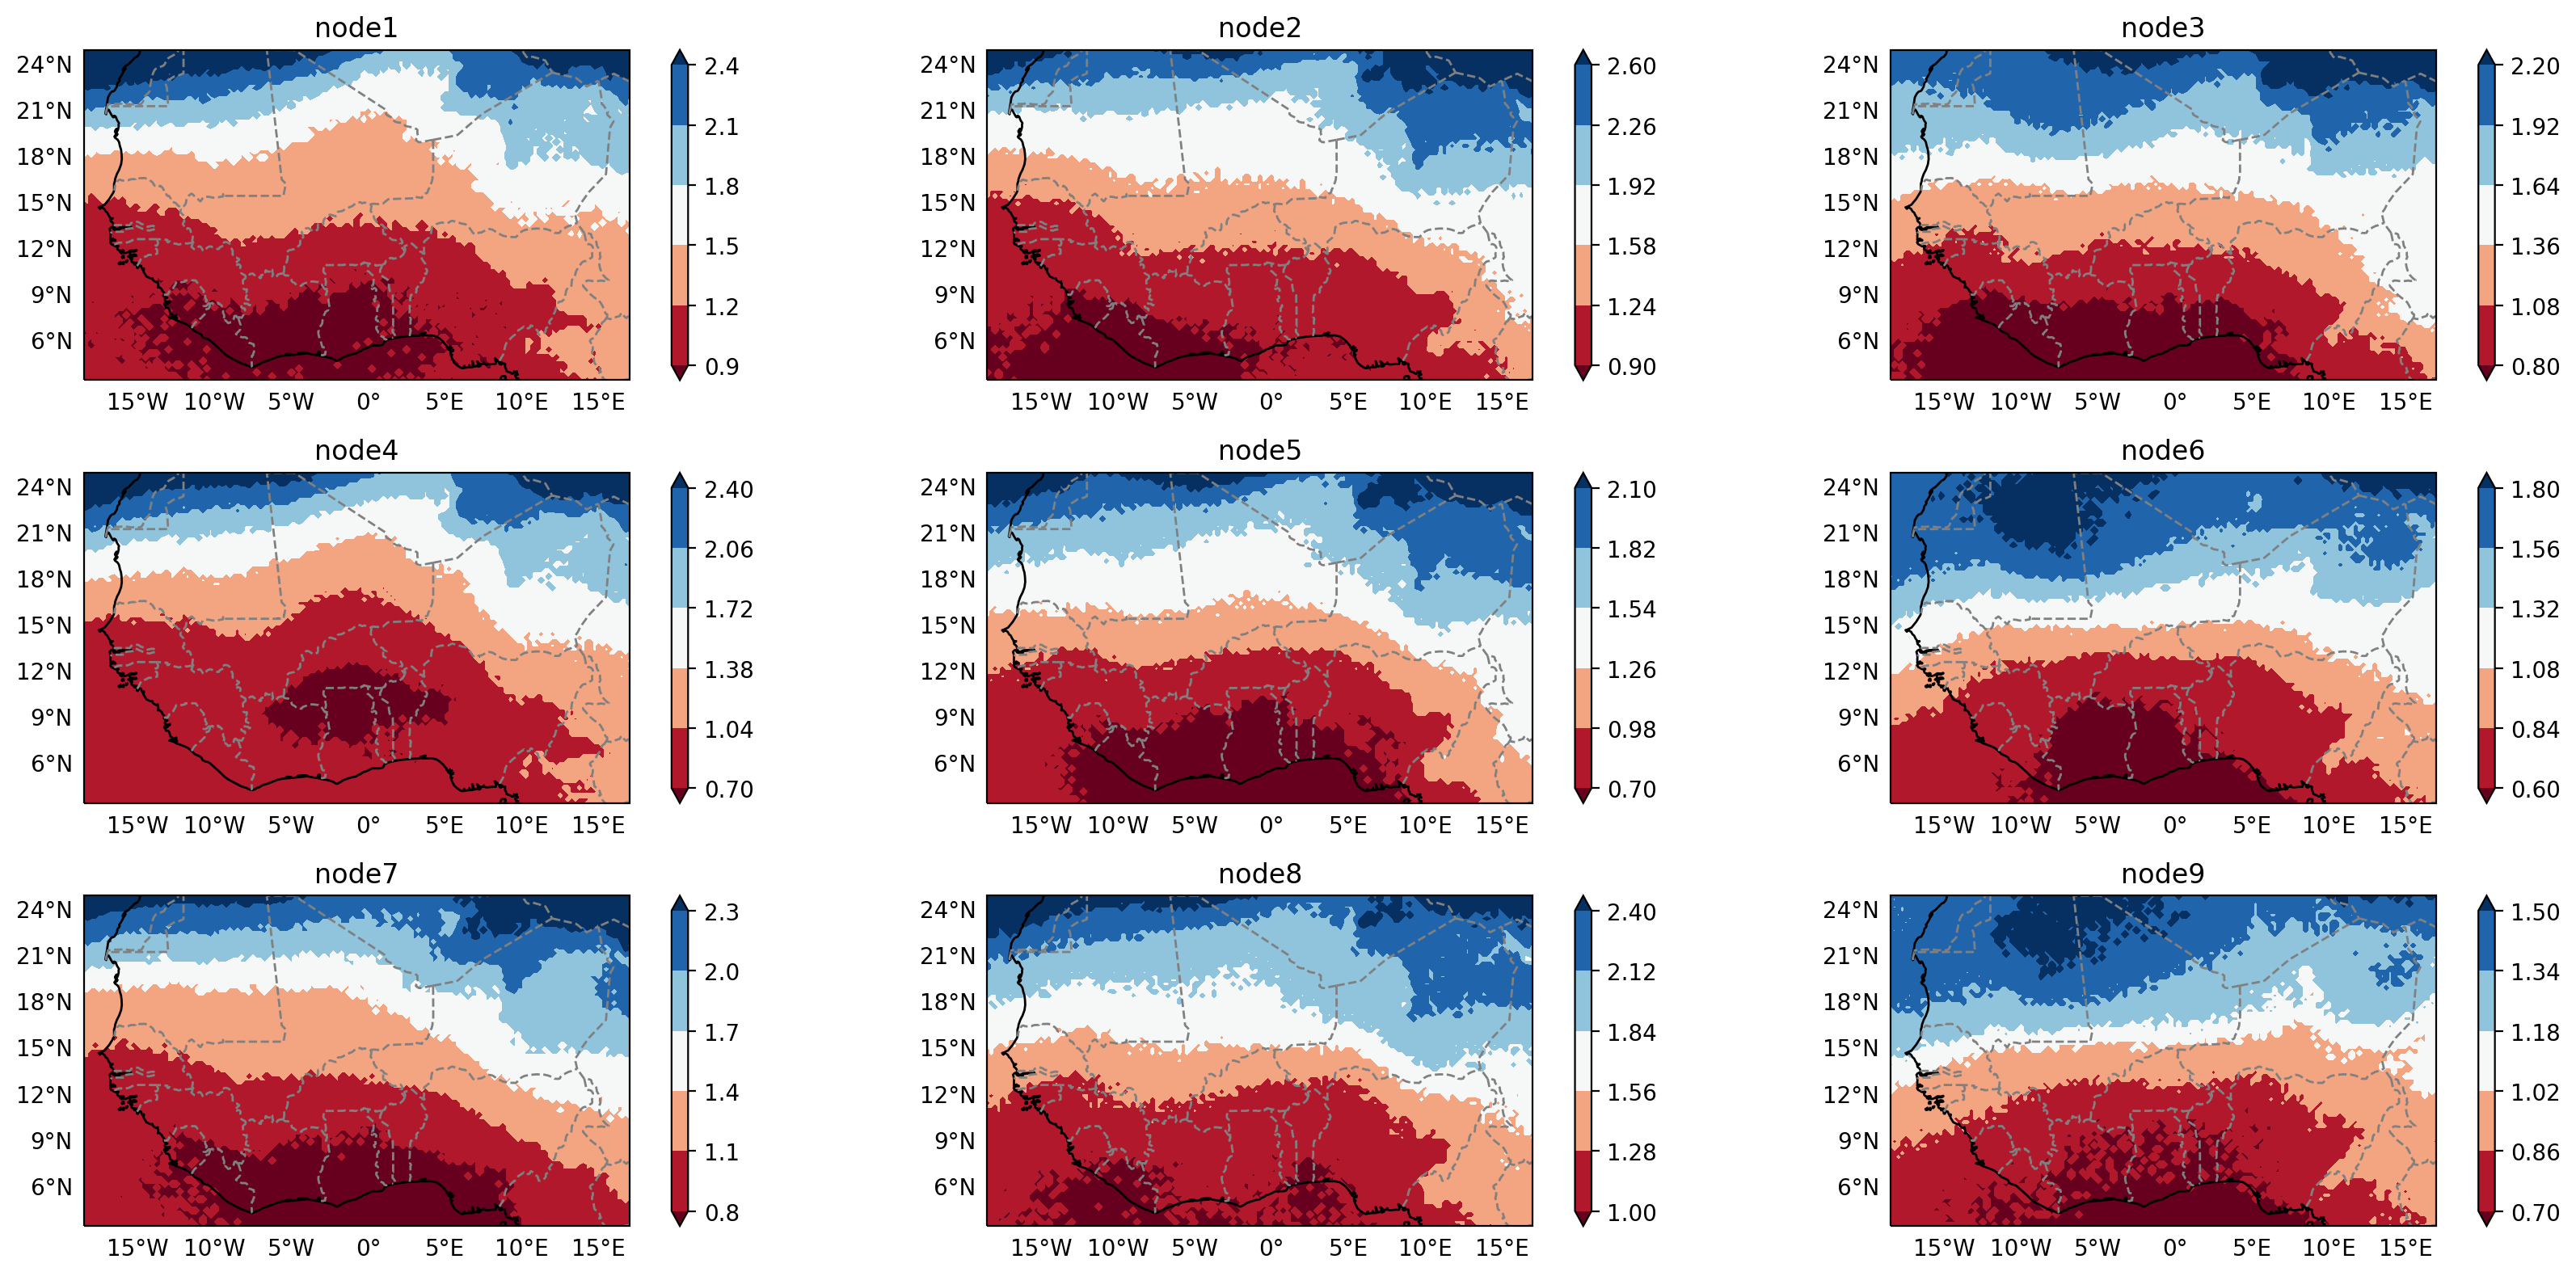

In [6]:
filetag = 'srfc'
fft = 'surface'
filebase = cnst.other_drive + '/ERA5_WAf/hourly/' 
filepath = filebase + fft+'/ERA5*'+filetag+'.nc'
dummy = xr.open_dataset(glob.glob(filepath)[0])
dummy = u_darrays.flip_lat(dummy)


f = plt.figure(figsize=(17,8), dpi=200)
for ni in range(1,10):
    nodestr = 'node'+str(ni)
    
    mean = all_nodes[ni][0]/10
    low = all_nodes[ni][1]/10
    high = all_nodes[ni][2]/10
    
    ax = f.add_subplot(3,3,ni, projection=ccrs.PlateCarree())

    mean[(mean<low) | (mean>high)] = np.nan
    
    print(np.sum((mean<low) | (mean>high)))
    
    #diff = (mm[var].sel(level=650))-(cc[var].sel(level=650))
    # sd = stda[var]
    # mask = np.abs(diff) > sd
    #ipdb.set_trace()
    #levs = np.linspace(1005,1018,8)

    edge = np.nanpercentile(np.round(high-low,1), [5,95]) #np.max([np.abs(np.nanpercentile(mean,5)),np.abs(np.nanpercentile(mean,95))])
    levs = np.linspace(edge[0],edge[1],6)
    
#     if ni == 3:
#         levs = [0,1]

    draw_map(ax, np.round(high-low,1), dummy.latitude, dummy.longitude, title=nodestr, levels=levs, barlabel='', cmap='RdBu')

#     ax.set_ylim(3.5,25)
#     ax.set_xlim(-18.5,17)
plt.tight_layout()
f.savefig(cnst.network_data + 'figs/SOMS/gph_CIs_5000resample_0.99.pdf')